# Python 1 : Data Cleaning and EDA

Welcome to Python 1. In this workshop we will cover data manipulation, feature engineering and exploratory analysis. These are very important steps in the data science workflow. <br><br>

## Importing our Data
We will start by importing our dataset.<br><br>
Data : **The McDonalds Menu**<br>
The data was taken from : https://www.kaggle.com/mcdonalds/nutrition-facts

In [75]:
import pandas as pd

In [76]:
data = pd.read_csv('menu.csv')

In [77]:
data.head(3)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10


## Data Cleaning
In data science, data cleaning is the process of reformatting the data you are given into a format that makes it more organized, easier to understand, and easier to work with. This is an important step because 80% of your time as a data scientist will be spent cleaning data. Knowing the techniques we cover in this workshop will help make the process quicker and less painstaking.

#### Taking a look at the data features

In [78]:
data.columns

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

These are our features with **numerical values**

In [79]:
data.describe().columns

Index(['Calories', 'Calories from Fat', 'Total Fat',
       'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

These are our features with **catagorical values**. We can convert our lists to sets and use set arithmetic to so this.

In [80]:
list(set(data.columns) - set(data.describe().columns))

['Category', 'Item', 'Serving Size']

In [81]:
data[data.describe().columns].sample(5)

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
167,250,0,0.0,0,0.0,0,0.0,5,2,135,...,51,17,1,4,48,12,15,0,40,0
23,500,230,26.0,40,10.0,52,0.0,50,17,1320,...,46,15,2,9,15,21,2,0,20,10
225,670,240,26.0,41,17.0,85,1.0,90,30,190,...,98,33,1,4,88,11,20,0,35,4
139,0,0,0.0,0,0.0,0,0.0,0,0,15,...,0,0,0,0,0,0,0,0,0,0
227,550,200,23.0,35,15.0,73,1.0,80,27,160,...,79,26,0,0,71,9,20,0,30,2


In [82]:
data[list(set(data.columns) - set(data.describe().columns))].sample(5)

,Category,Item,Serving Size
40,Breakfast,Fruit & Maple Oatmeal,9.6 oz (251 g)
201,Coffee & Tea,Caramel Iced Coffee (Large),32 fl oz cup
87,Salads,Premium Southwest Salad (without Chicken),8.1 oz (230 g)
243,Smoothies & Shakes,Vanilla Shake (Large),22 fl oz cup
43,Beef & Pork,Quarter Pounder with Cheese,7.1 oz (202 g)


First lets check to see if we have uniform values for our category features

In [83]:
data.Category.unique()

array(['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads',
       'Snacks & Sides', 'Desserts', 'Beverages', 'Coffee & Tea',
       'Smoothies & Shakes'], dtype=object)

We can see that the categories are pretty nicely seperated so we dont have to do anything this column

One thing that is a little messy and could cause problems in our Serving Size column. These are stores as strings.

In [84]:
data['Serving Size'][1]

'4.8 oz (135 g)'

In [85]:
type(data['Serving Size'][1])

str

Lets convert these to numerical float values. <br><br>

In this case we want to create a function that we can apply to the whole <code>Serving Size</code> column. We can use the pandas apply function to do this. First we need to create the function we want to apply to the column

First lets look at the unique values in this column.

In [86]:
data['Serving Size'].unique()

array(['4.8 oz (136 g)', '4.8 oz (135 g)', '3.9 oz (111 g)',
       '5.7 oz (161 g)', '6.5 oz (185 g)', '5.3 oz (150 g)',
       '5.8 oz (164 g)', '5.4 oz (153 g)', '5.9 oz (167 g)',
       '4.1 oz (117 g)', '4.6 oz (131 g)', '5.7 oz (163 g)',
       '6.2 oz (177 g)', '6.4 oz (181 g)', '5 oz (143 g)',
       '5.5 oz (157 g)', '7.1 oz (201 g)', '6.1 oz (174 g)',
       '6.3 oz (178 g)', '5 oz (141 g)', '7.2 oz (205 g)',
       '6.9 oz (197 g)', '8.5 oz (241 g)', '9.5 oz (269 g)',
       '10 oz (283 g)', '9.6 oz (272 g)', '10.1 oz (286 g)',
       '14.8 oz (420 g)', '15.3 oz (434 g)', '14.9 oz (423 g)',
       '15.4 oz (437 g)', '5.3 oz (151 g)', '6.8 oz (192 g)',
       '2 oz (56 g)', '4 oz (114 g)', '9.6 oz (251 g)', '7.4 oz (211 g)',
       '7.1 oz (202 g)', '8 oz (227 g)', '8.3 oz (235 g)',
       '8.6 oz (244 g)', '3.5 oz (98 g)', '4 oz (113 g)',
       '9.5 oz (270 g)', '5.2 oz (147 g)', '6.7 oz (190 g)',
       '5.6 oz (159 g)', '7.3 oz (208 g)', '7.5 oz (213 g)',
       '7 oz (20

Here we see that there are already gram conversions here. But some of the data points are in fluid ounces without the gram conversion. For the sake of simplicity lets convert the serving size column to grams.<br><br>
The conversion from 1 fl oz to gram is as follows:

$1$ $fl$ $oz$ $=$ $29.57352956$ $g$<br><br>
We can use this to calculate our grams.

In [87]:
def serving_size_cleaning(data_point):
    
    # First lets get handle the case of the values with given gram conversions
    if data_point[-2:] == 'g)':
        search_ind = data_point.find('(') + 1
        grams = float(data_point[search_ind: -3])
        
    # Next lets handle the case that uses ml. The baseline conversion is 1 ml = 1 g so use this for simplicity
    elif data_point[-3:] == 'ml)':
        search_ind = data_point.find('(') + 1
        grams = float(data_point[search_ind: -4])
        
    # Next lets handle the only remaining case which is the fl oz unit case
    else:
        search_ind = data_point.find(' ')
        grams = float(data_point[:search_ind]) * 29.57352956
    
    return grams
        
        

Lets test to see if our function works

In [88]:
serving_size_cleaning('20 fl oz cup')

591.4705912000001

Now lets apply it to our <code>Serving Size</code> column

In [89]:
data['Serving Size'].apply(serving_size_cleaning)[:10]

0    136.0
1    135.0
2    111.0
3    161.0
4    161.0
5    185.0
6    150.0
7    164.0
8    153.0
9    167.0
Name: Serving Size, dtype: float64

Now that we know it works lets save it to our dataset

In [90]:
data['Serving Size'] = data['Serving Size'].apply(serving_size_cleaning)

In [91]:
data.sample(10)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
106,Desserts,Kids Ice Cream Cone,29.000000,45,10,1.5,2,1.0,4,0.0,...,7,2,0,0,6,1,2,0,4,0
104,Desserts,Chocolate Chip Cookie,33.000000,160,70,8.0,12,3.5,19,0.0,...,21,7,1,3,15,2,2,0,2,8
136,Beverages,Dasani Water Bottle,499.792650,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
120,Beverages,Dr Pepper (Large),887.205887,270,0,0.0,0,0.0,0,0.0,...,72,24,0,0,70,0,0,0,0,0
140,Coffee & Tea,Iced Tea (Child),354.882355,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
15,Breakfast,Sausage Biscuit with Egg Whites (Large Biscuit),181.000000,520,280,32.0,49,13.0,65,0.0,...,40,13,3,11,3,18,4,0,8,15
45,Beef & Pork,Quarter Pounder with Bacon Habanero Ranch,235.000000,610,280,31.0,48,13.0,64,1.5,...,46,15,3,14,10,37,8,20,25,30
238,Smoothies & Shakes,Mango Pineapple Smoothie (Small),354.882355,210,5,0.5,1,0.0,0,0.0,...,50,17,1,4,46,2,30,20,8,2
124,Beverages,Diet Dr Pepper (Large),887.205887,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,4,0,0,0,0
74,Chicken & Fish,Premium McWrap Southwest Chicken (Crispy Chicken),314.000000,670,300,33.0,51,8.0,40,0.5,...,68,23,5,19,12,27,60,15,20,20


## EDA

Now that we have cleaned our data lets take a look at what we have and see if we can find out more information about it. This process is called **Exporatory Data Analysis** or **EDA** <br><br>

We can use visual aids by using the <code>matplotlib</code> library.

In [105]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

To get us started we want to ask some questions about the data. A simple on to start would be:<br>
What is the breakdown of the categories of the food items on the McDonald menu?

In [93]:
data.Category.value_counts()

Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Beverages             27
Chicken & Fish        27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: Category, dtype: int64

We can turn this into a bar graph for a visual look at this.

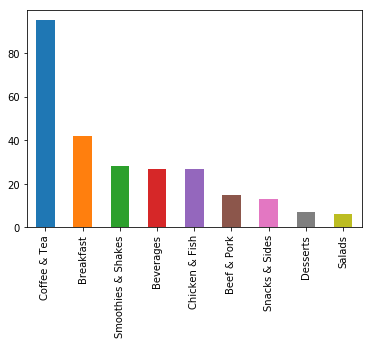

In [94]:
data.Category.value_counts().plot('bar')
plt.show()

There is a lot of McCafe options on the menu. Lets take a look at these and see why this is the case.

In [95]:
data[data.Category == 'Coffee & Tea'].sample(5)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
206,Coffee & Tea,French Vanilla Iced Coffee (Medium),650.617650,170,60,7.0,11,4.5,22,0.0,...,27,9,0,0,26,1,4,0,4,0
170,Coffee & Tea,Nonfat Hazelnut Latte (Medium),473.176473,250,0,0.0,0,0.0,0,0.0,...,51,17,1,4,48,12,15,0,40,0
192,Coffee & Tea,Hot Chocolate (Large),591.470591,540,180,20.0,31,12.0,58,0.5,...,73,24,1,5,68,17,20,0,60,8
210,Coffee & Tea,Iced Coffee with Sugar Free French Vanilla Syr...,946.352946,160,80,9.0,14,6.0,29,0.0,...,18,6,0,0,2,2,6,0,8,0
176,Coffee & Tea,Nonfat Latte with Sugar Free French Vanilla Sy...,473.176473,170,0,0.0,0,0.0,0,0.0,...,30,10,1,5,16,12,15,0,40,0


From this we see that the cause of there being many items in this category is because of the variety of options available.

Next lets try to see which of these catagories have the most and least calories.

In [96]:
# Getting the different catagories from the menu
categories = data.Category.unique()
categories

array(['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads',
       'Snacks & Sides', 'Desserts', 'Beverages', 'Coffee & Tea',
       'Smoothies & Shakes'], dtype=object)

Lets store our data into a dictionary to organize our results.

In [97]:
cat_calories = {}
for x in categories:
    to_add = {x:data[data.Category == x].Calories.mean()}
    cat_calories.update(to_add)

In [98]:
cat_calories

{'Beef & Pork': 494.0,
 'Beverages': 113.70370370370371,
 'Breakfast': 526.6666666666666,
 'Chicken & Fish': 552.9629629629629,
 'Coffee & Tea': 283.89473684210526,
 'Desserts': 222.14285714285714,
 'Salads': 270.0,
 'Smoothies & Shakes': 531.4285714285714,
 'Snacks & Sides': 245.76923076923077}

Lets plot these using a bar plot again

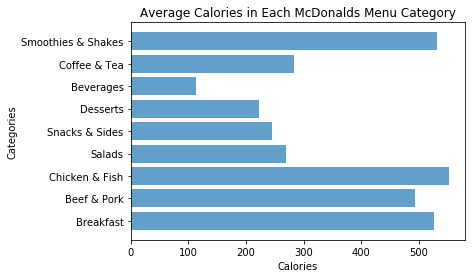

In [99]:
plt.barh(list(cat_calories.keys()), [cat_calories[x] for x in cat_calories.keys()], alpha = 0.7)
plt.title('Average Calories in Each McDonalds Menu Category')
plt.xlabel('Calories')
plt.ylabel('Categories')
plt.show()

## Hypothesis Testing

Hypothesis testing is another vital tool a data scientist needs to have. It's helpful in the EDA process to know how prove or disprove any doubts or questions you may have about the data with a process to back up your claim. <br><br>

In the case we were just investigating we used average as our metric to determine the calorie counts of each set of data. We got the following top three results:
    1. Chicken & Fish : 552.96
    2. Smoothies & Shakes : 531.43
    3. Breakfast : 526.67
    
These values are all pretty close together and since we used average as our metric I want to make sure that there aren't any outlier's influencing the outcome. To do this I can create a hypothesis test and prove it using a simulation. For time sake we will just look at the case of the Breakfast category ($B$) and the Smoothies and Shakes Category ($SS$)

$H_{o}:$ ${\mu}_{B}$ ${\ge}$ ${\mu}_{SS}$<br>
$H_{a}:$ ${\mu}_{B}$ $<$ ${\mu}_{SS}$<br>

In hypothesis testing we want to confirm our simulation results by using a significance level ($a$). In most cases $a = 0.05$ so that is what we will use here. This means that if our $H_{o}$ is correct less than 0.05 percent of the time, then we will reject it.<br><br> 
### Simulation
 Lets start importing the numpy library. 


In [100]:
import numpy as np

Now lets separate out our two categories into different lists.

In [101]:
breakfast = np.array(data[data.Category == 'Breakfast'].Calories)
breakfast

array([ 300,  250,  370,  450,  400,  430,  460,  520,  410,  470,  430,
        480,  510,  570,  460,  520,  410,  470,  540,  460,  400,  420,
        550,  500,  620,  570,  670,  740,  800,  640,  690, 1090, 1150,
        990, 1050,  350,  520,  300,  150,  460,  290,  260])

In [102]:
shakes = np.array(data[data.Category == 'Smoothies & Shakes'].Calories)
shakes

array([220, 260, 340, 210, 250, 330, 210, 260, 340, 530, 660, 820, 550,
       690, 850, 560, 700, 850, 660, 820, 650, 930, 430, 510, 690, 340,
       810, 410])

Now lets create our simulation

In [104]:
supporting_count = 0
sims = 1000

for _ in range(sims):
    
    # Takes a random sample from each category
    breakfast_sample = np.random.choice(breakfast, size = 10,)
    shake_sample = np.random.choice(shakes, size = 10,)
    
    # Logic to see it supports our null hypothesis
    if breakfast_sample.mean() >= shake_sample.mean():
        supporting_count += 1

print('P-Value : ' + str(supporting_count/sims))

P-Value : 0.469


**Conclusion:** <br>
Since our simulation supports the $H_{o}$ about half the time, we do not reject the null hypothesis and can conclude that the calories of Breakfast items are not less than the Shakes. This of course makses sense because there are both healthy and unhealthy options on the menu at McDonalds on both the breakfast and shake menu.

## Thanks for coming out to Python 1.
We hope to see you all at a future website. Please let us know your feedback about this workshop!
<br><br>
**Visit us :** www.dsiufl.org